In [ ]:
#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

#import data

In [3]:
#define path to prepared data folder
preparedDataPath= r'C:\Users\user\nycpayrollanalysis\02 Data\prepareddata'

In [4]:
goodcols=["Base Salary","Regular Gross Paid","Total OT Paid","Total Other Pay"]
df=pd.read_csv(os.path.join(preparedDataPath,'payroll_clean.csv'),usecols=goodcols)

In [5]:
df.head()

,Base Salary,Regular Gross Paid,Total OT Paid,Total Other Pay
0,86005.0,84698.21,0.0,0.0
1,86005.0,84698.21,0.0,0.0
2,86005.0,84698.21,0.0,0.0
3,86005.0,84698.21,0.0,0.0
4,86005.0,84698.21,0.0,0.0


#create elbow chart to determine clusters

In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_k

[-1.693848853778858e+16,
 -5837918997869666.0,
 -3430916890587291.0,
 -2640292763557227.0,
 -2193244932334321.0,
 -1840517831212059.8,
 -1555659520336574.2,
 -1358037034973276.5,
 -1187378640854764.2]

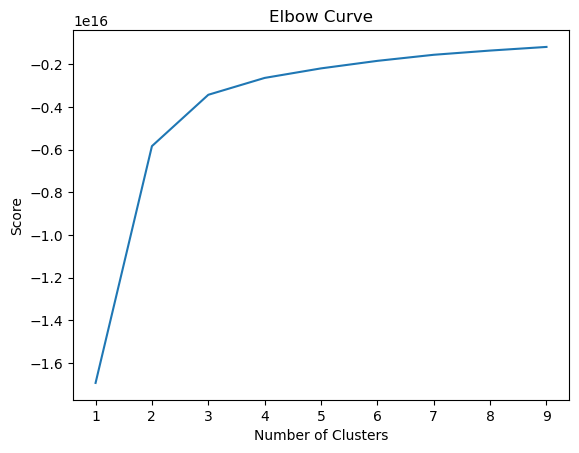

In [8]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Informed decision on number of clusters: 3
This is because the curve increases significantly until 3 and then it flattens after 3.

#create cluster scatterplots

In [10]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [11]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
df.head()

,Base Salary,Regular Gross Paid,Total OT Paid,Total Other Pay,clusters
0,86005.0,84698.21,0.0,0.0,1
1,86005.0,84698.21,0.0,0.0,1
2,86005.0,84698.21,0.0,0.0,1
3,86005.0,84698.21,0.0,0.0,1
4,86005.0,84698.21,0.0,0.0,1


In [14]:
df['clusters'].value_counts()

2    2071546
0    1594450
1    1249341
Name: clusters, dtype: int64

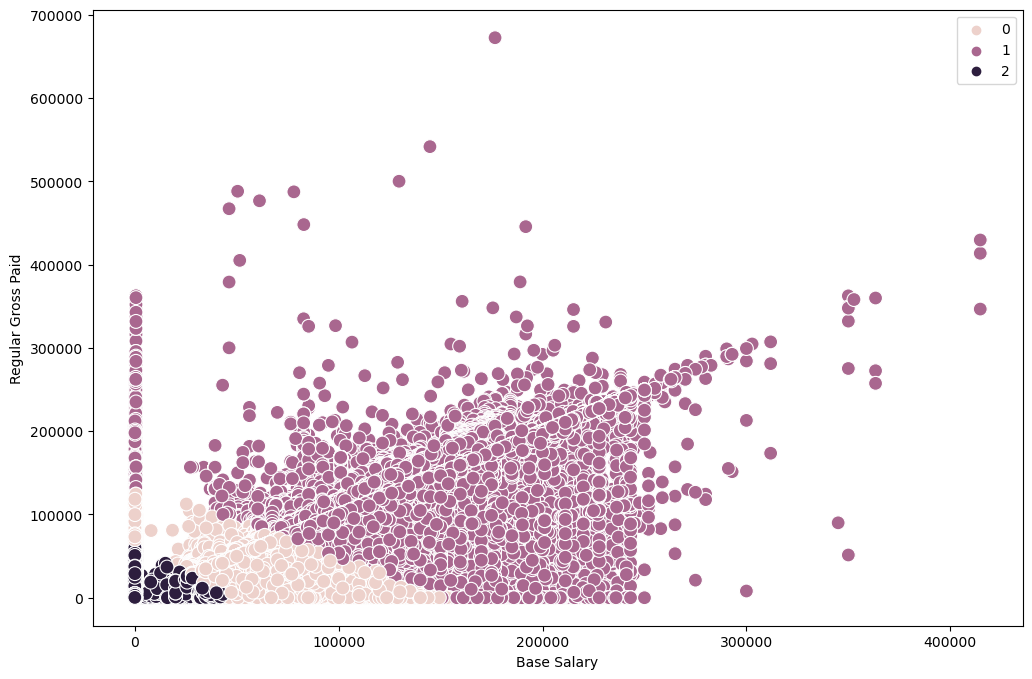

In [15]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Base Salary'], y=df['Regular Gross Paid'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Base Salary') # Label x-axis.
plt.ylabel('Regular Gross Paid') # Label y-axis.
plt.show()

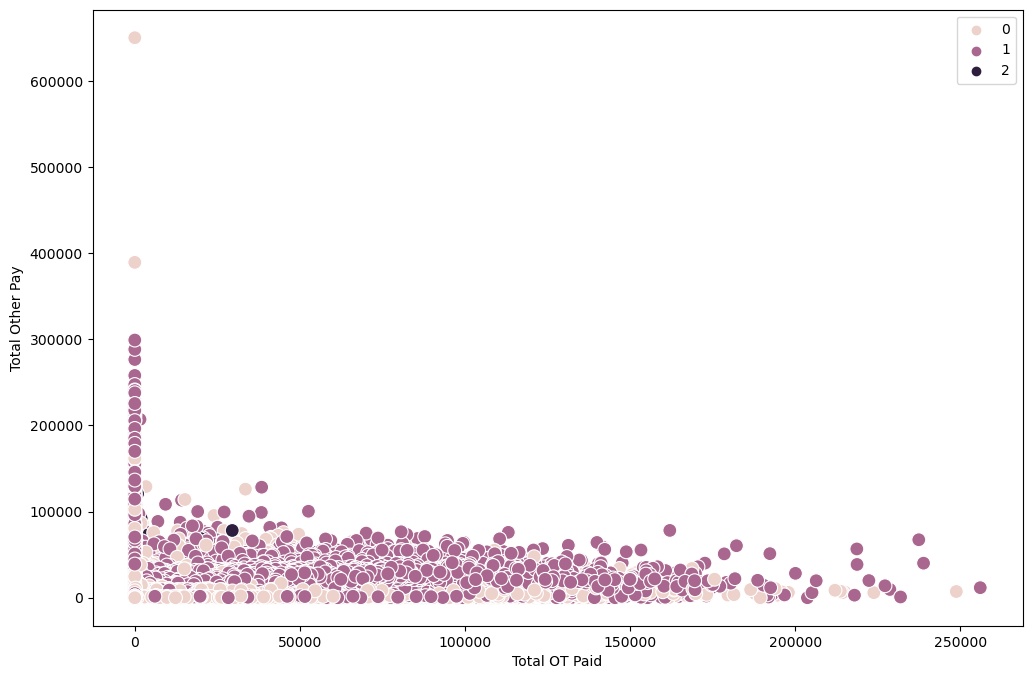

In [16]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total OT Paid'], y=df['Total Other Pay'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total OT Paid') 
plt.ylabel('Total Other Pay') 
plt.show()

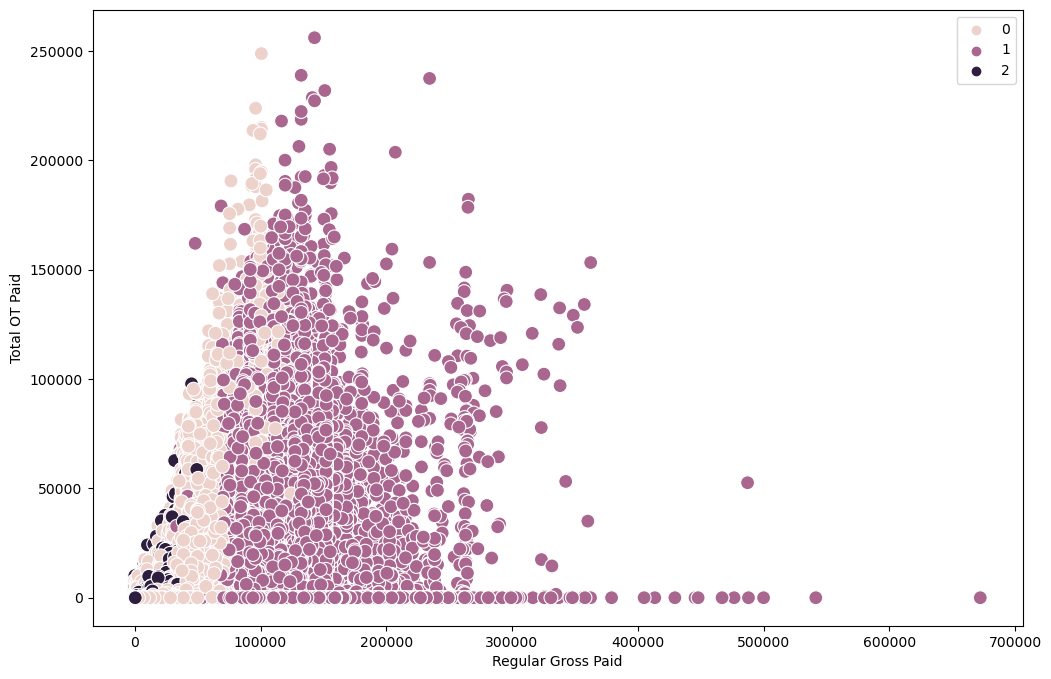

In [17]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Regular Gross Paid'], y=df['Total OT Paid'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Regular Gross Paid') 
plt.ylabel('Total OT Paid') 
plt.show()

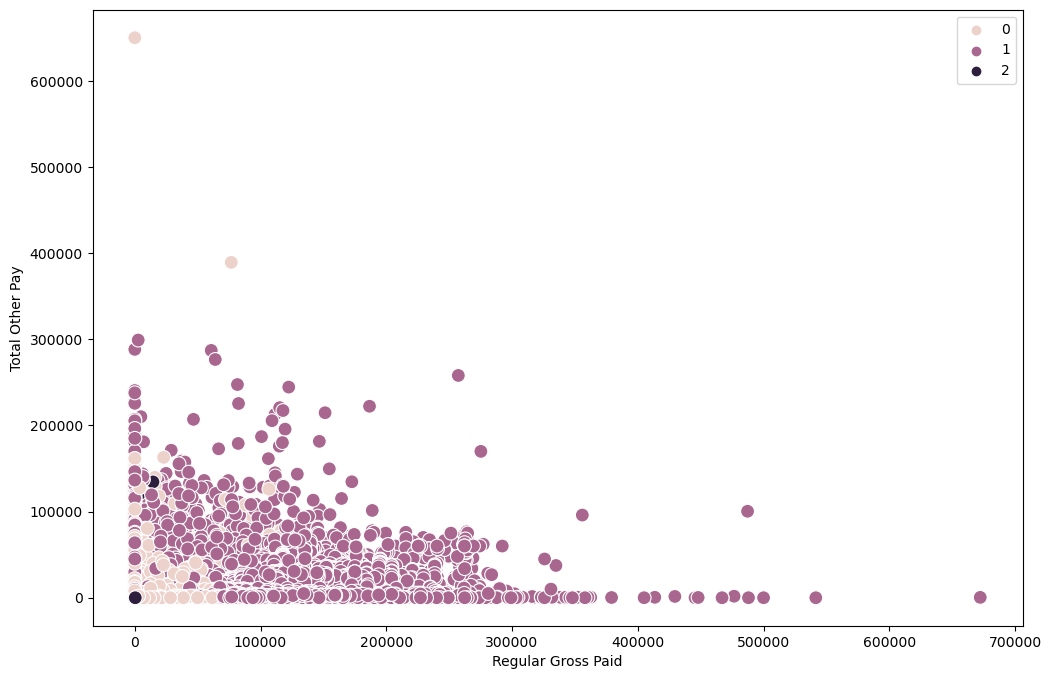

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Regular Gross Paid'], y=df['Total Other Pay'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Regular Gross Paid') 
plt.ylabel('Total Other Pay') 
plt.show()

# Observations on the Scatterplots

Regular Gross Paid and Total OT Paid - this is the 3rd scatterplot shown in this notebook.
This chart has the most interesting relationship.
The three clusters show that the audience can be divided into groups based on Regular Gross Paid, but the amount of OT Paid can increase within each of these three groups.  This matches the information found in the previous exercise related to supervised machine learning, where it seems the number of regular hours worked has a mild influence on the number of over time hours worked.  The relationship in this exercise looks at the amount of money paid based on working these hours.

Total Other Pay - this variable appears in the 2nd and 4th scatterplots on this notebook.
These charts show that there is almost no relationship to Total Other Pay and Regular Gross Paid or Total OT Paid.  Therefore Total Other Pay is not based on the amount of Regular Hours or Overtime Hours.

In [19]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df.groupby('cluster').agg({'Regular Gross Paid':['mean', 'median'], 
                         'Total OT Paid':['mean', 'median'], 
                         'Total Other Pay':['mean', 'median']})

Regular Gross Paid            Total OT Paid         \
                          mean     median          mean median   
cluster                                                          
dark purple        6933.423559   2183.115    113.012688    0.0   
pink              44447.220045  45135.085   3875.214281    0.0   
purple            95703.355130  89890.080   8279.199371    0.0   

            Total Other Pay            
                       mean    median  
cluster                                
dark purple      382.605425     0.000  
pink            2864.702004  1148.445  
purple          7334.518578  4397.800

# Observations of Groups

Group 1 dark purple - has Regular Pay recorded around 2000 to 7000 dollars, this also includes a large number of 0 dollars.  This group earns a small amount of Overtime around 100 dollars and Other Pay around 380 dollars.

Group 2 pink - this group has Regular Pay around 45,000 dollars, overtime pay up to 3,800 dollars and other pay around 2,800 dollars.

Group 3 purple - this group has Regular Pay around 90,000 dollars, overtime pay up to 8,200 and Other Pay between 4,000 and 7,000 dollars.

The groups are most distinguished based on their Regular Pay and as the amount of Regular Pay increases, it is likely the amount of Overtime and Other Pay increase too.

The main observation that is worth additional analysis is to determine what other factors, such as agency or job title, contribute to the increase in Overtime pay.